In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
Laptop=[]
Prices=[]
Description=[]
Reviews=[]

In [8]:
url="https://www.flipkart.com/search?q=laptops%20under%2020k&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
r=requests.get(url)
print(r)

soup=BeautifulSoup(r.text,"lxml")
box=soup.find("div",class_="_1YokD2 _3Mn1Gg")

laptop=box.find_all("div",class_="_4rR01T")
for i in laptop:
    name=i.text
    Laptop.append(name)
    
price=box.find_all("div",class_="_30jeq3 _1_WHN1")
for i in price:
    p=i.text
    Prices.append(p)
                   
description=box.find_all("ul",class_="_1xgFaf")
for i in description:
        des=i.text
        Description.append(des)   

review=box.find_all("div",class_="_3LWZlK")
for i in review:
            re=i.text
            Reviews.append(re)

            
            
            
            
print(len(Laptop))
print(len(Prices))
print(len(Description))
print(len(Reviews))

<Response [200]>
96
96
96
90


In [11]:
DF_data=pd.DataFrame({
    "Laptop":Laptop,
    "Prices":Prices,
    "Description":Description
    
    })

In [12]:
DF_data

,Laptop,Prices,Description
0,HP 15s Intel Core i5 11th Gen 1135G7 - (8 GB/5...,"₹47,500",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
1,MSI GF63 Intel Core i5 11th Gen 11260H - (16 G...,"₹47,990",Intel Core i5 Processor (11th Gen)16 GB DDR4 R...
2,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,"₹34,990",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...
3,HP Victus AMD Ryzen 5 Hexa Core 5600H - (8 GB/...,"₹48,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAMWi...
4,HP Pavilion 15 (2023) Intel Core i3 12th Gen 1...,"₹48,490",Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...
...,...,...,...
91,ASUS Chromebook Intel Celeron Dual Core N4500 ...,"₹16,990",Intel Celeron Dual Core Processor4 GB LPDDR4X ...
92,Acer Chromebook Intel Celeron Dual Core N4000 ...,"₹19,771",Intel Celeron Dual Core Processor4 GB DDR4 RAM...
93,ASUS VivoBook 15 AMD Ryzen 3 Dual Core AMD R3-...,"₹18,590",AMD Ryzen 3 Dual Core Processor4 GB DDR4 RAM64...
94,Lenovo Ideapad Slim 3 MediaTek Kompanio 520 - ...,"₹19,990",MediaTek Kompanio 520 Processor8 GB LPDDR4X RA...


In [16]:
# DF_data['Prices']=DF_data['Prices'].str.replace(',','')
# DF_data['Prices']=DF_data['Prices'].str.replace('₹','')

In [17]:
DF_data['Prices']=pd.to_numeric(DF_data['Prices'])

In [20]:
top_5=DF_data.sort_values(by='Prices',ascending=False).head(10)
top_5

,Laptop,Prices,Description
89,ASUS ROG Flow X13 (2022) AMD Ryzen 9 Octa Core...,99990,AMD Ryzen 9 Octa Core Processor16 GB LPDDR5 RA...
17,ASUS ROG Flow X13 (2022) AMD Ryzen 9 Octa Core...,99990,AMD Ryzen 9 Octa Core Processor16 GB LPDDR5 RA...
61,ASUS ROG Zephyrus G14 with 76WHr Battery AMD R...,89990,AMD Ryzen 9 Octa Core Processor16 GB DDR4 RAMW...
37,ASUS ROG Zephyrus G14 with 76WHr Battery AMD R...,89990,AMD Ryzen 9 Octa Core Processor16 GB DDR4 RAMW...
55,ASUS ROG Strix G15 (2022) AMD Ryzen 7 Octa Cor...,88990,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAM6...
36,ASUS ROG Strix G15 (2022) AMD Ryzen 7 Octa Cor...,88990,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAM6...
88,Lenovo IdeaPad Gaming 3 AMD Ryzen 5 Hexa Core ...,67990,AMD Ryzen 5 Hexa Core Processor16 GB DDR5 RAMW...
16,Lenovo IdeaPad Gaming 3 AMD Ryzen 5 Hexa Core ...,67990,AMD Ryzen 5 Hexa Core Processor16 GB DDR5 RAMW...
27,MSI Bravo 15 AMD Ryzen 7 Octa Core 5800H - (16...,54990,AMD Ryzen 7 Octa Core Processor16 GB DDR RAM64...
7,MSI Bravo 15 AMD Ryzen 7 Octa Core 5800H - (16...,54990,AMD Ryzen 7 Octa Core Processor16 GB DDR RAM64...


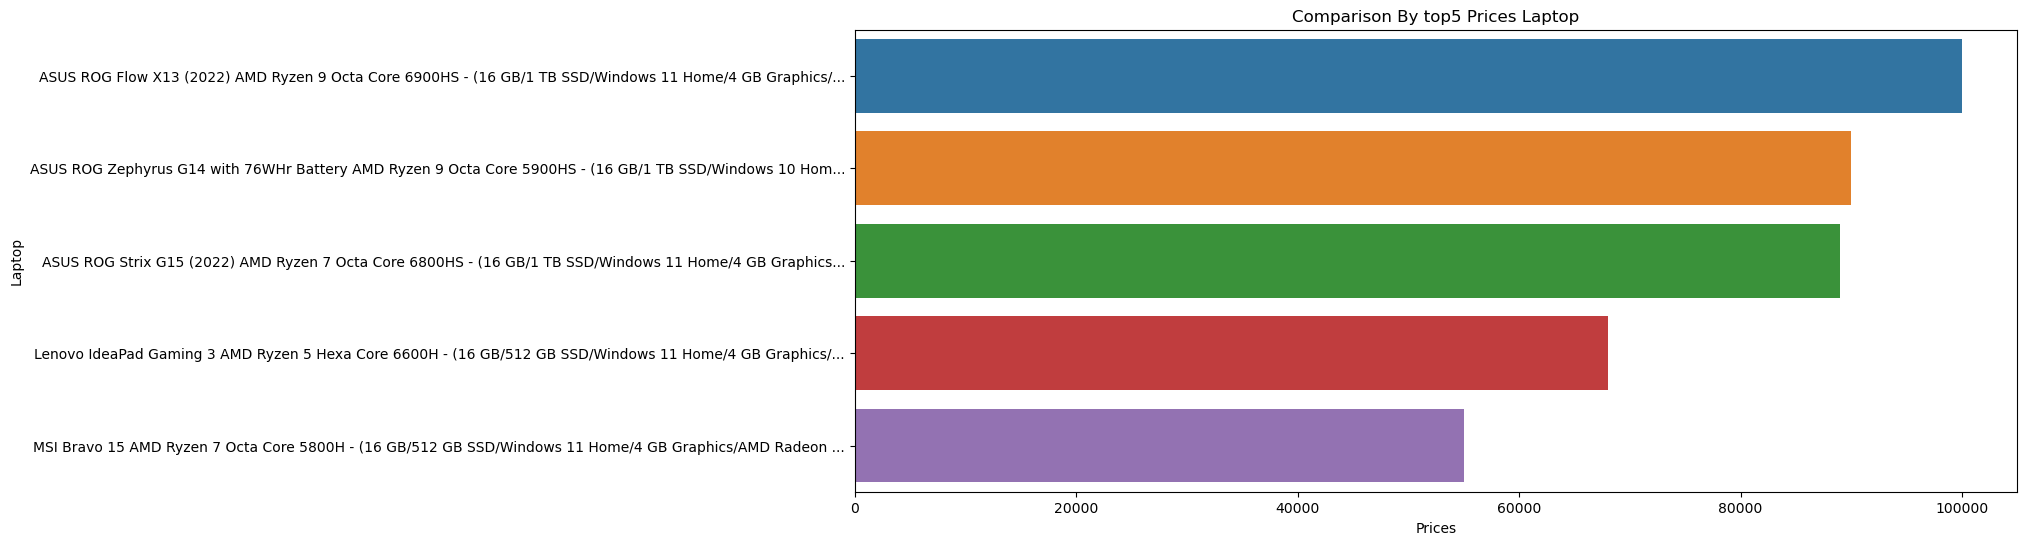

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(y=top_5['Laptop'],x=top_5['Prices'])
plt.title("Comparison By top5 Prices Laptop")
plt.show()